In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Importar las métricas de CLASIFICACIÓN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Importar los modelos de CLASIFICACIÓN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [7]:
%ls


dataset-uci.xlsx  sample_data/


In [14]:

try:
    # Intenta leer el archivo Excel
    df = pd.read_excel('dataset-uci.xlsx', sheet_name="dataset")

    # Verificación básica de los datos
    print('Se leyó un dataset de dimensiones {}'.format(df.shape))
    print("\nPrimeras filas del dataset:")
    display(df.head())

except FileNotFoundError:
    print("Error: El archivo 'dataset-uci.xlsx' no se encontró en el directorio actual.")

except Exception as e:
    print(f"Error al leer el archivo Excel: {str(e)}")
    print("\nPosibles soluciones:")
    print("1. Verifica que el archivo existe y tiene extensión .xlsx")
    print("2. Asegúrate de tener instalado openpyxl (pip install openpyxl)")
    print("3. Si el archivo está dañado, intenta abrirlo con Excel y guardarlo nuevamente")
    print("4. Prueba especificar el nombre de la hoja:")
    print('   df = pd.read_excel("dataset-uci.xlsx", sheet_name="NombreHoja")')

Se leyó un dataset de dimensiones (319, 39)

Primeras filas del dataset:


,GallstoneStatus,Age,Gender,Comorbidity,CAD,Hypothyroidism,Hyperlipidemia,DM,Height,Weight,...,HDL,Triglyceride,AST,ALT,ALP,Creatinine,GFR,CRP,HGB,VitaminD
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


# Correlación

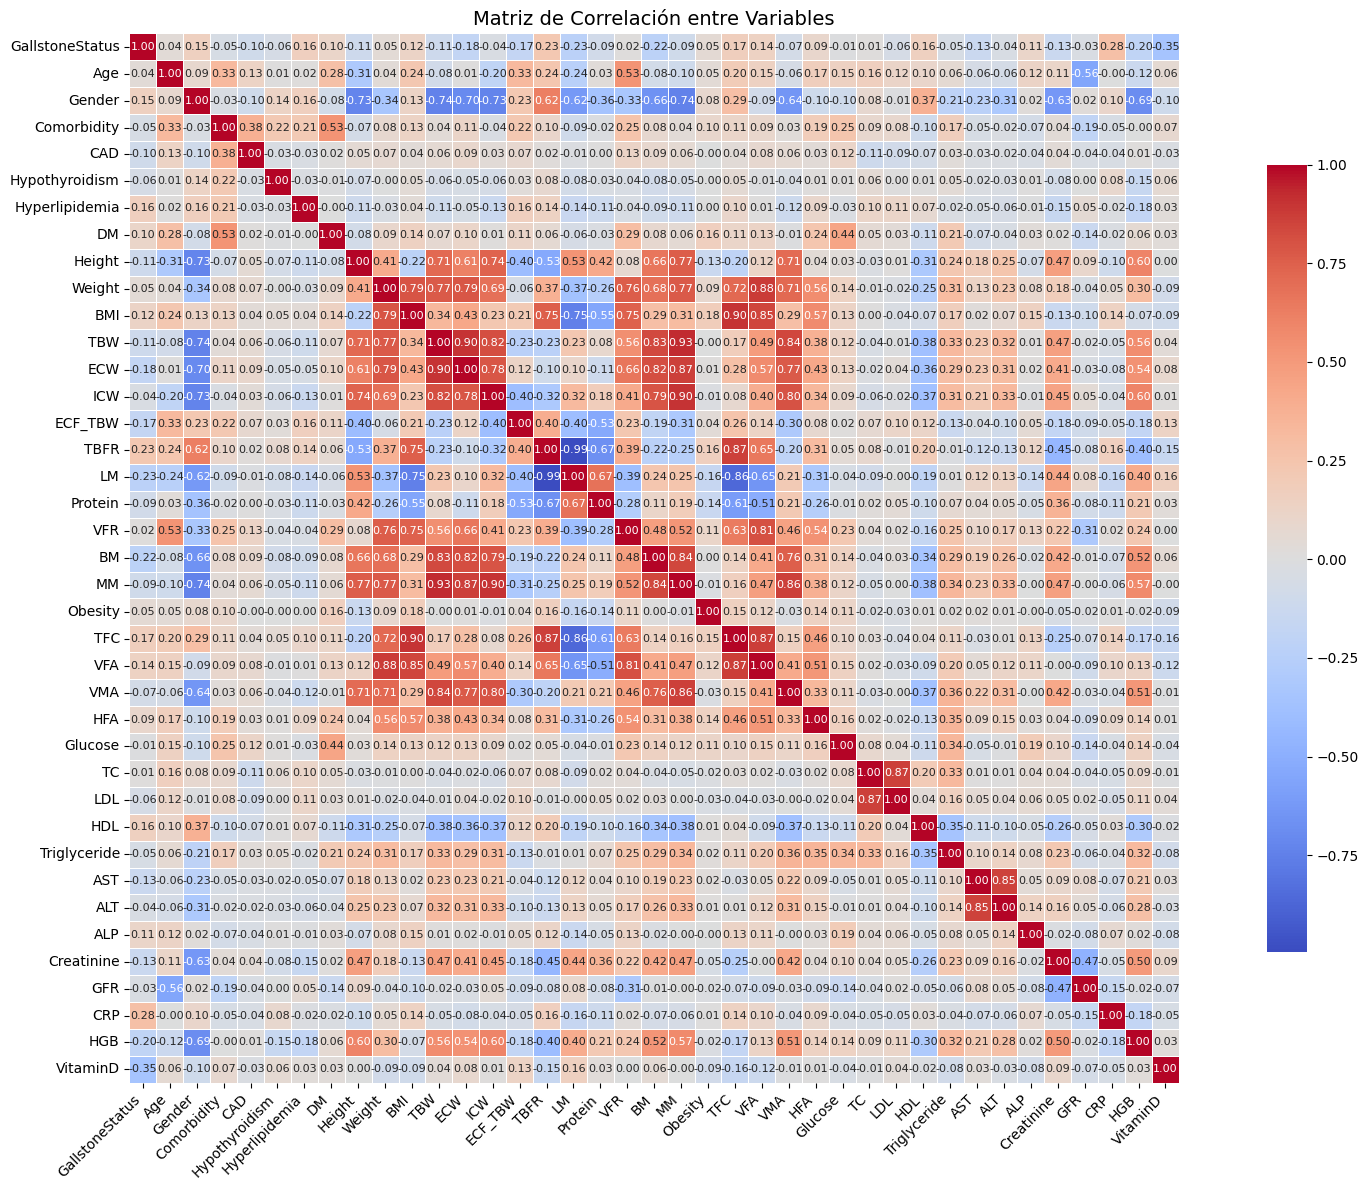

In [15]:
#################### NO MODIFICAR ESTA CELDA #########################
plt.figure(figsize=(18, 12))
correlation_matrix = df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 8}
)

plt.title("Matriz de Correlación entre Variables", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


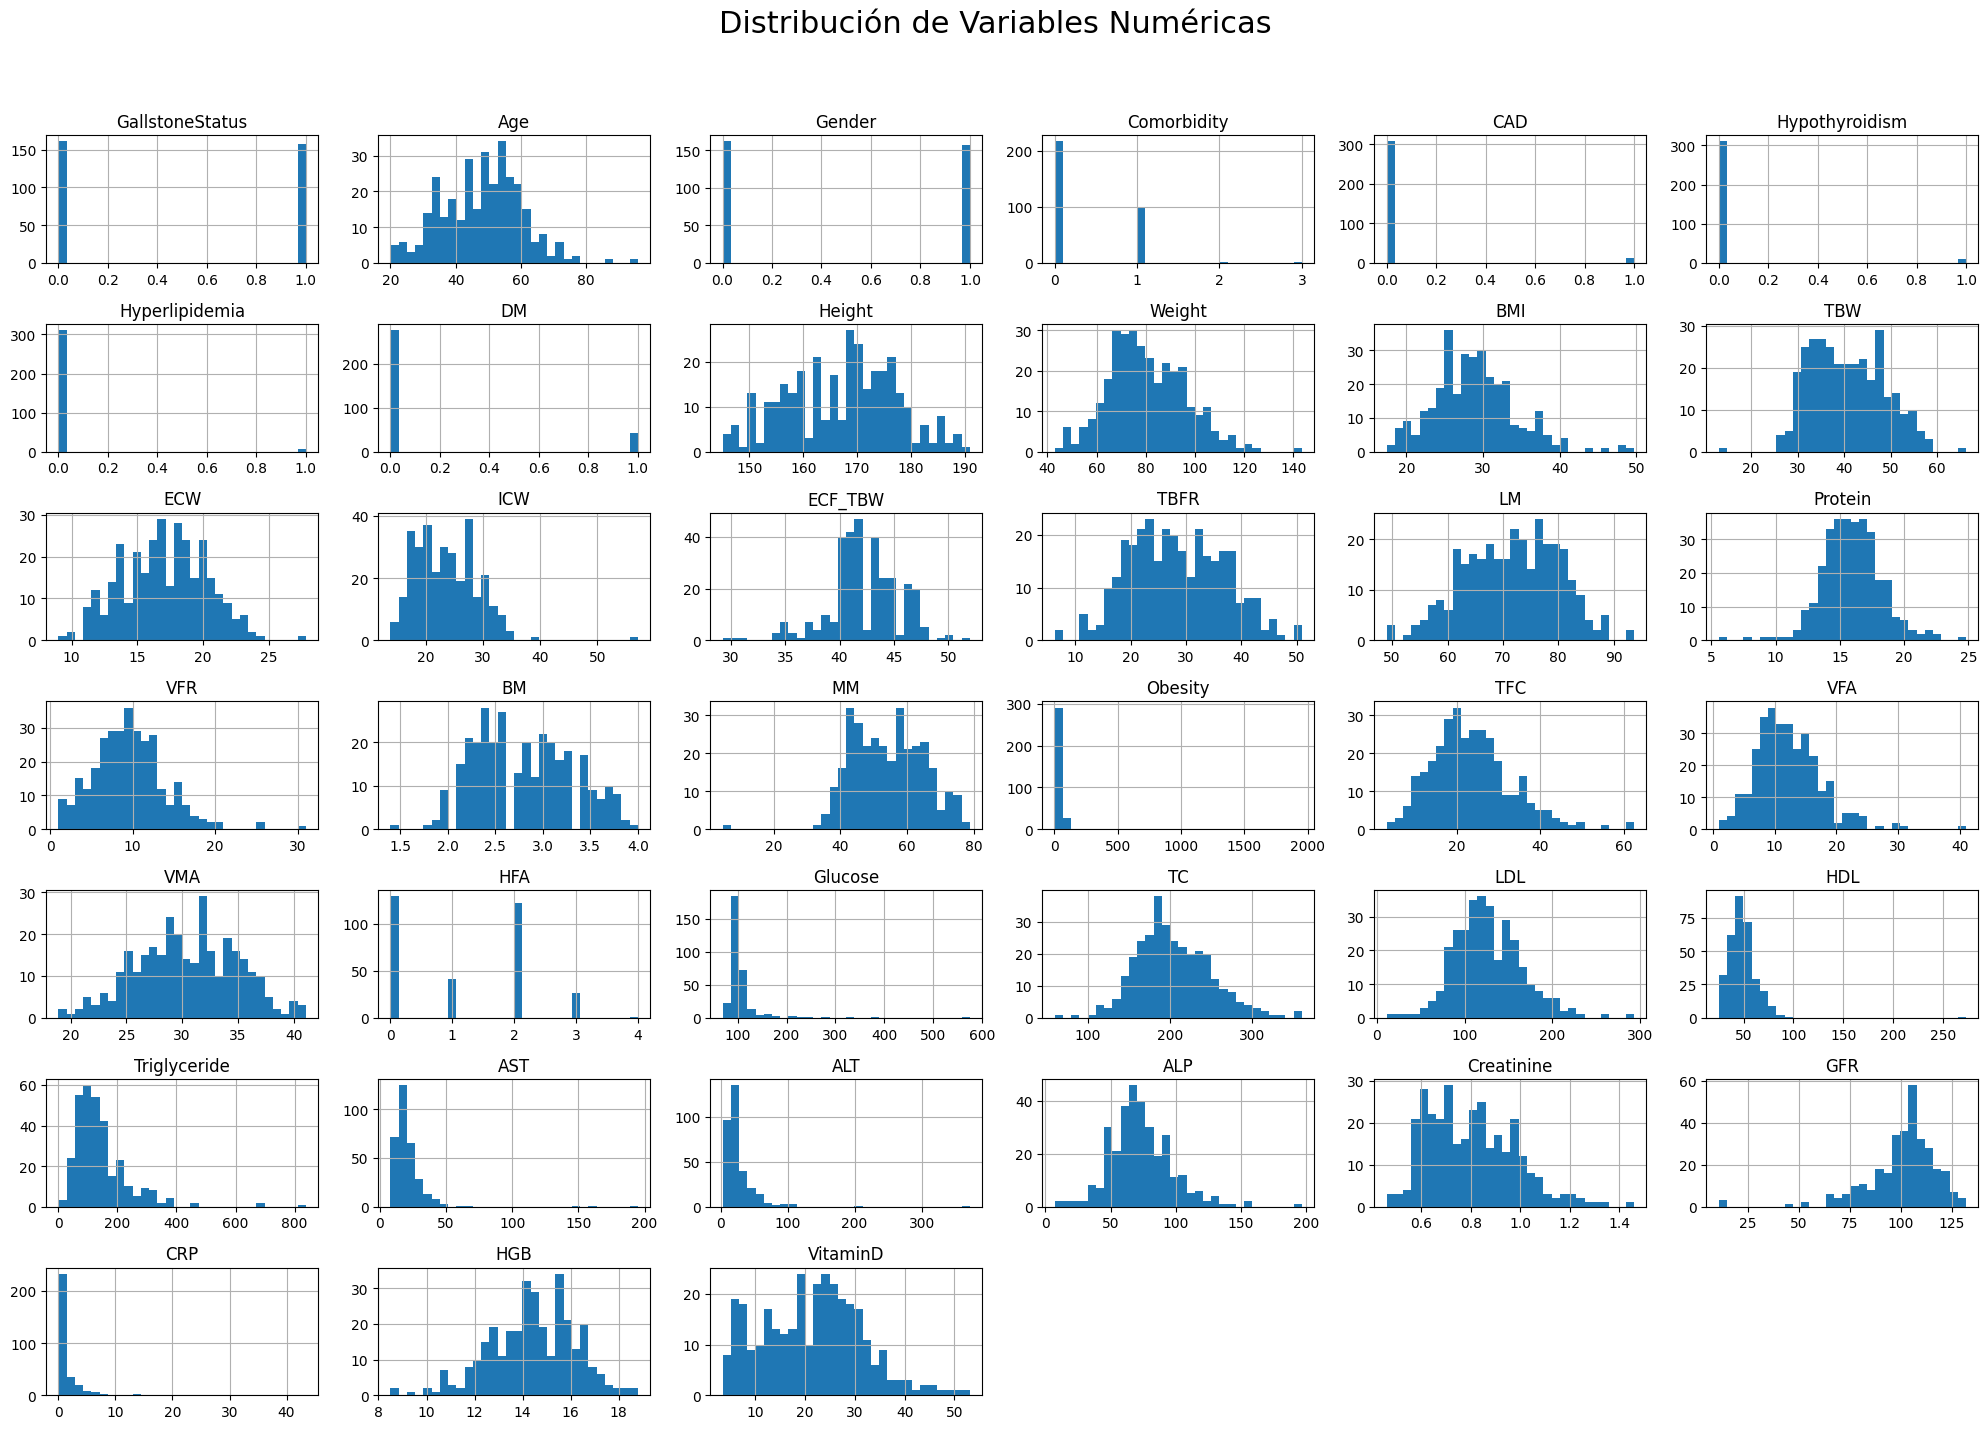

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Establece el tamaño de la figura
df_numerico.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribución de Variables Numéricas', fontsize=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

ValueError: num must be an integer with 1 <= num <= 20, not 21

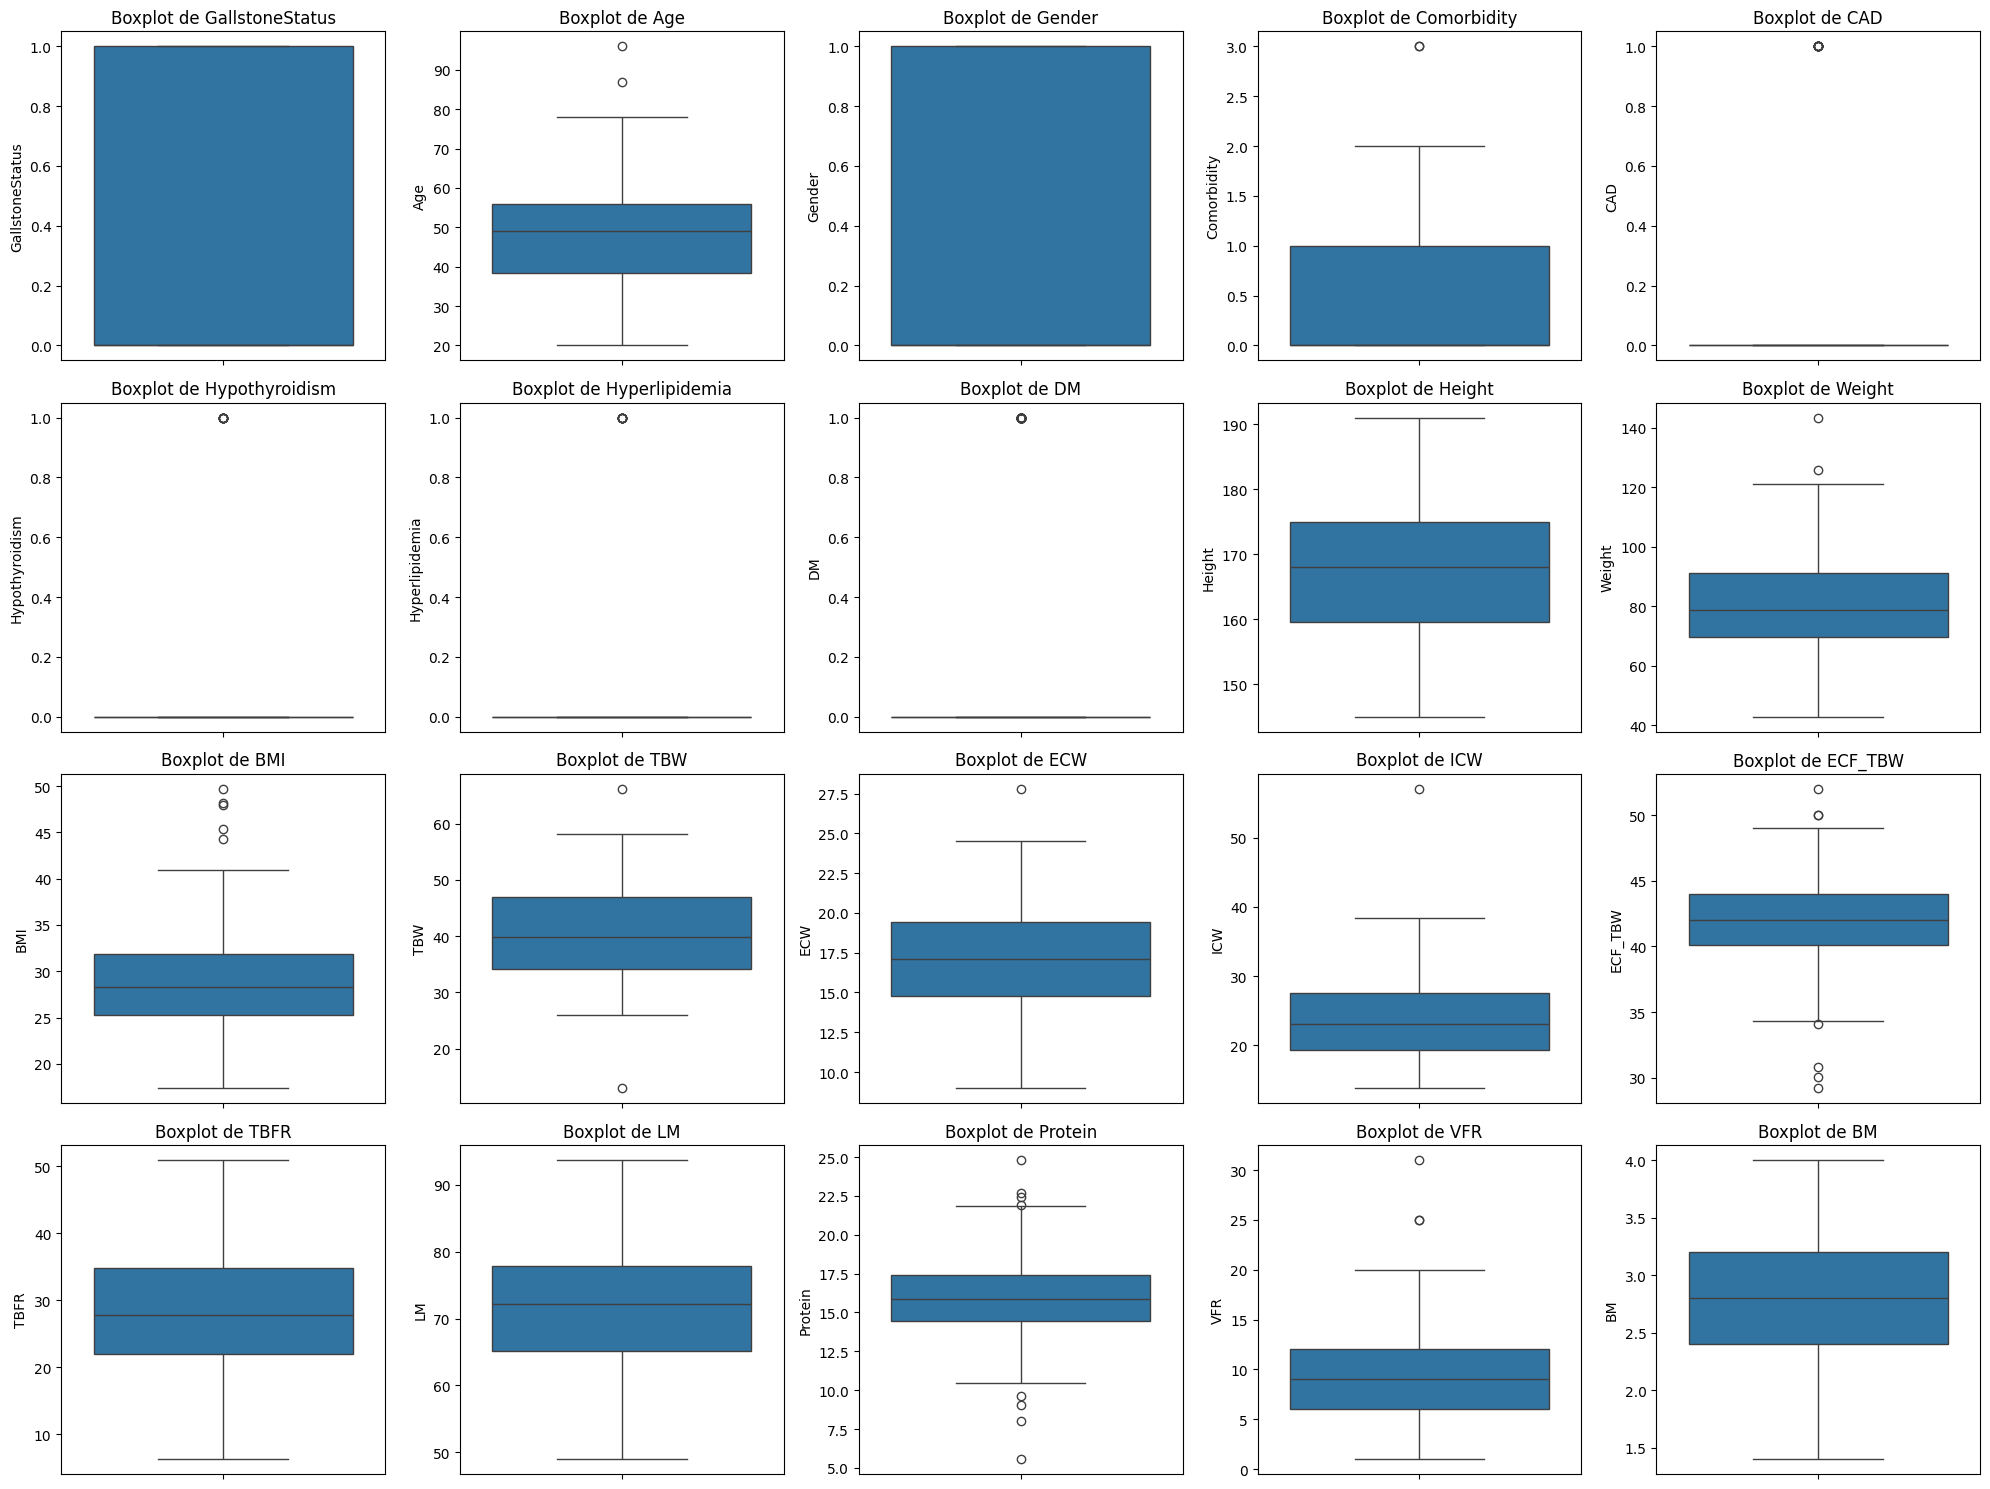

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numerico = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 15))
for i, column in enumerate(df_numerico.columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=df_numerico[column])
    plt.title(f'Boxplot de {column}')
    plt.tight_layout()

plt.suptitle('Boxplots para Detección de Outliers', fontsize=22)
plt.show()

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona las columnas categóricas (ejemplo)
df_categorico = df.select_dtypes(include=['object'])

# Si no hay variables categóricas, esta parte no se ejecutará
if not df_categorico.empty:
    plt.figure(figsize=(20, 10))
    for i, column in enumerate(df_categorico.columns, 1):
        plt.subplot(2, 3, i)
        sns.countplot(y=df_categorico[column], order = df_categorico[column].value_counts().index)
        plt.title(f'Conteo de {column}')
        plt.tight_layout()

    plt.suptitle('Conteo de Variables Categóricas', fontsize=22)
    plt.show()

In [16]:
y = df.GallstoneStatus
X = df.drop(columns = ['GallstoneStatus'])
X.head()

,Age,Gender,Comorbidity,CAD,Hypothyroidism,Hyperlipidemia,DM,Height,Weight,BMI,...,HDL,Triglyceride,AST,ALT,ALP,Creatinine,GFR,CRP,HGB,VitaminD
0,50,0,0,0,0,0,0,185,92.8,27.1,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,47,0,1,0,0,0,0,176,94.5,30.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,61,0,0,0,0,0,0,171,91.1,31.2,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,41,0,0,0,0,0,0,168,67.7,24.0,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,42,0,0,0,0,0,0,178,89.6,28.3,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [17]:
y.head()

,GallstoneStatus
0,0
1,0
2,0
3,0
4,0


In [18]:
y = 1 - y

In [19]:
y.head()

,GallstoneStatus
0,1
1,1
2,1
3,1
4,1


In [20]:
#################### NO MODIFICAR ESTA CELDA #########################
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

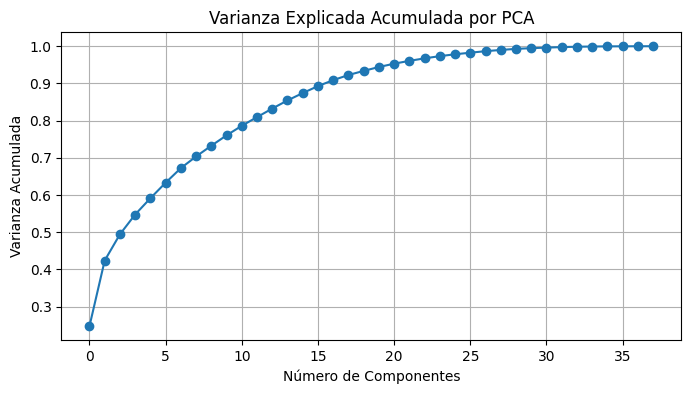

In [21]:
#################### NO MODIFICAR ESTA CELDA #########################
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Varianza Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.show()


* El eje x representa el número de componentes principales.

* El eje y representa la varianza acumulada explicada hasta ese componente.

* La curva sube y se aplana, indicando el punto a partir del cual añadir más componentes no aporta mucha más información.

In [109]:
n_components = 32

pca = PCA(n_components=n_components)
fit_pca = pca.fit(X_scaled)
X_transformed_pca = fit_pca.transform(X_scaled)

# muestra resultados de transformacion PCA
print("Ratio de varianza explicada: {}".format(fit_pca.explained_variance_ratio_))
print(fit_pca.explained_variance_ratio_)
suma = 0
for i in fit_pca.explained_variance_ratio_:
  suma = suma + i
print(f"El porcentaje de varianza acumulada es: {suma} %")

Ratio de varianza explicada: [0.24699273 0.17660954 0.07058901 0.05324706 0.04374359 0.0417634
 0.03927362 0.03131707 0.02895497 0.02781213 0.02576781 0.02325686
 0.02302359 0.02189963 0.01974257 0.01875623 0.01604357 0.01379141
 0.01105169 0.01045809 0.00895427 0.00757011 0.00679249 0.00588602
 0.00504195 0.00425017 0.00408705 0.00327926 0.00291987 0.00190832
 0.00145506 0.0014037 ]
[0.24699273 0.17660954 0.07058901 0.05324706 0.04374359 0.0417634
 0.03927362 0.03131707 0.02895497 0.02781213 0.02576781 0.02325686
 0.02302359 0.02189963 0.01974257 0.01875623 0.01604357 0.01379141
 0.01105169 0.01045809 0.00895427 0.00757011 0.00679249 0.00588602
 0.00504195 0.00425017 0.00408705 0.00327926 0.00291987 0.00190832
 0.00145506 0.0014037 ]
El porcentaje de varianza acumulada es: 0.997642835163677 %


# Train test


In [110]:
test_size = 0.30

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
X_train, X_test, _, _ = train_test_split(X_transformed_pca, y, test_size=test_size, random_state=42)

# Tamaños de los conjuntos de datos
print(" Conjunto original (escalado):")
print("X_train_full shape:", X_train_orig.shape)
print("X_test_full shape:", X_test_orig.shape)


print("\n Conjunto reducido con PCA (N componentes):")
print("X_train_pca shape:", X_train.shape)
print("X_test_pca shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


 Conjunto original (escalado):
X_train_full shape: (223, 38)
X_test_full shape: (96, 38)

 Conjunto reducido con PCA (N componentes):
X_train_pca shape: (223, 32)
X_test_pca shape: (96, 32)
y_train shape: (223,)
y_test shape: (96,)


# Modelos seleccionados


In [118]:
k_vecinos =  39

# Diccionario de modelos con los parámetros configurables
# --- Diccionario de modelos ---
# --- Diccionario de modelos de CLASIFICACIÓN ---
models = {
    'Logistic Regression': LogisticRegression(random_state=60),
    'K-Neighbors Classifier': KNeighborsClassifier(n_neighbors=k_vecinos),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=40),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=120, max_depth=3, min_samples_leaf=3, random_state=35),
    'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=80, learning_rate=0.03, max_depth=3, random_state=46),
    'XGBoost Classifier': XGBClassifier(n_estimators=120, learning_rate=0.06, max_depth=2, eval_metric='logloss', use_label_encoder=False, random_state=40),
    'LightGBM Classifier': LGBMClassifier(n_estimators=100, learning_rate=0.05, num_leaves=10, random_state=30),
    'CatBoost Classifier': CatBoostClassifier(n_estimators=90, learning_rate=0.08, verbose=0, random_state=42)
}


In [119]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluar_modelos(X_train, X_test, y_train, y_test, models):
    resultados_train = []
    resultados = []

    for nombre, modelo in models.items():
        # Entrenar el modelo
        modelo.fit(X_train, y_train)

        # Predicciones en train y test
        y_train_pred = modelo.predict(X_train)
        y_test_pred = modelo.predict(X_test)

        # Predicciones de probabilidad para el AUC
        y_train_proba = modelo.predict_proba(X_train)[:, 1]
        y_test_proba = modelo.predict_proba(X_test)[:, 1]

        # Agregar los resultados de TEST a la lista
        resultados.append({
            "Modelo": nombre,
            "Test Accuracy": accuracy_score(y_test, y_test_pred),
            "Test Precision": precision_score(y_test, y_test_pred),
            "Test Recall": recall_score(y_test, y_test_pred),
            "Test F1-Score": f1_score(y_test, y_test_pred),
            "Test AUC": roc_auc_score(y_test, y_test_proba)
        })

        # Agregar los resultados de TRAIN a la lista
        resultados_train.append({
            "Modelo": nombre,
            "Train Accuracy": accuracy_score(y_train, y_train_pred),
            "Train Precision": precision_score(y_train, y_train_pred),
            "Train Recall": recall_score(y_train, y_train_pred),
            "Train F1-Score": f1_score(y_train, y_train_pred),
            "Train AUC": roc_auc_score(y_train, y_train_proba),
        })

        # --- Agregar la matriz de confusión ---
        cm = confusion_matrix(y_test, y_test_pred)
        print(f"\n--- Matriz de Confusión para el modelo: {nombre} ---")
        print(cm)

        # Opcional: Visualizar la matriz de confusión
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Clase 0', 'Clase 1'],
                    yticklabels=['Clase 0', 'Clase 1'])
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        plt.title(f'Matriz de Confusión: {nombre}')
        plt.show()

    return pd.DataFrame(resultados), pd.DataFrame(resultados_train)


--- Matriz de Confusión para el modelo: Logistic Regression ---
[[33 13]
 [ 7 43]]


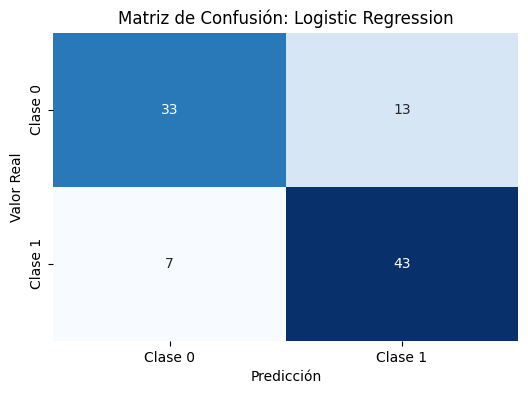


--- Matriz de Confusión para el modelo: K-Neighbors Classifier ---
[[17 29]
 [ 2 48]]


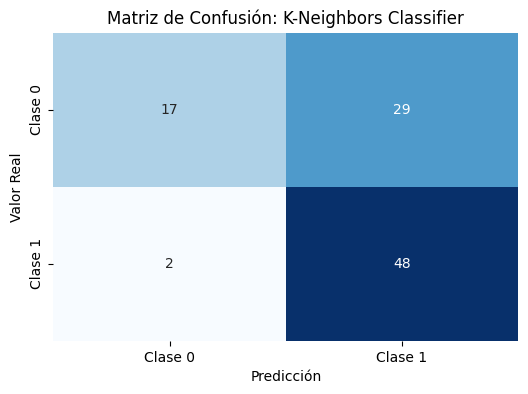


--- Matriz de Confusión para el modelo: Decision Tree Classifier ---
[[26 20]
 [17 33]]


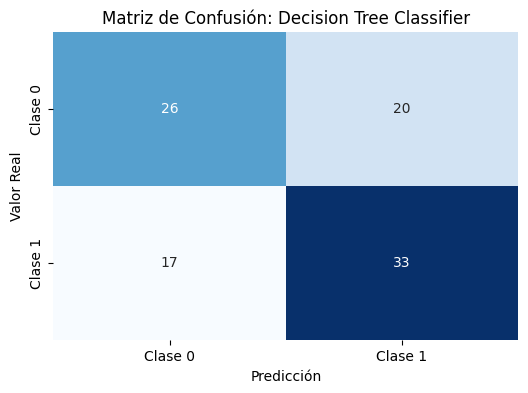


--- Matriz de Confusión para el modelo: Random Forest Classifier ---
[[30 16]
 [ 9 41]]


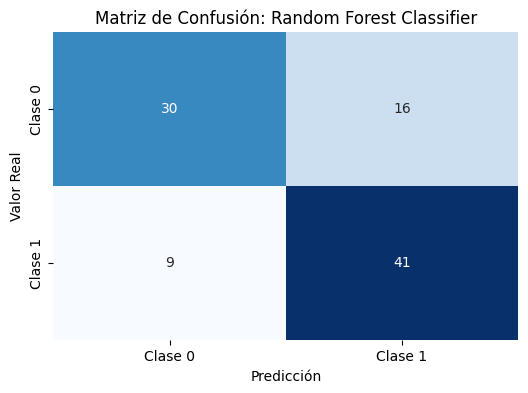


--- Matriz de Confusión para el modelo: Gradient Boosting Classifier ---
[[29 17]
 [11 39]]


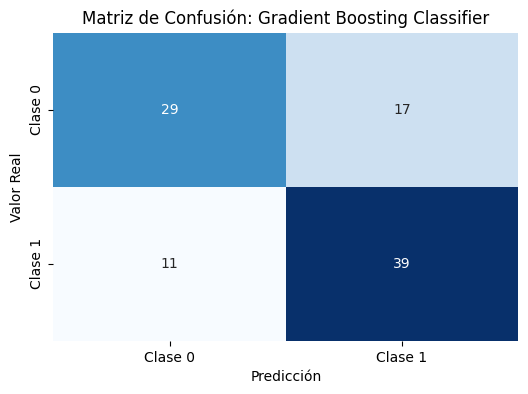


--- Matriz de Confusión para el modelo: XGBoost Classifier ---
[[33 13]
 [11 39]]


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:11:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


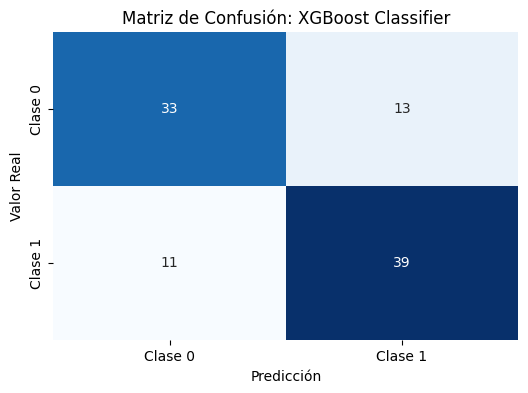

[LightGBM] [Info] Number of positive: 111, number of negative: 112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 223, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497758 -> initscore=-0.008969
[LightGBM] [Info] Start training from score -0.008969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


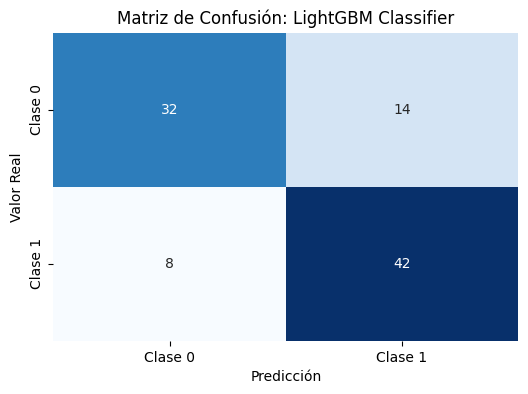


--- Matriz de Confusión para el modelo: CatBoost Classifier ---
[[31 15]
 [ 7 43]]


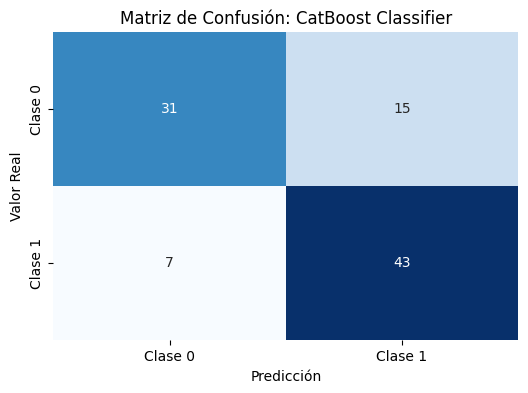

,Modelo,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Test AUC
0,Logistic Regression,0.791667,0.767857,0.86,0.811321,0.879565
1,K-Neighbors Classifier,0.677083,0.623377,0.96,0.755906,0.710217
2,Decision Tree Classifier,0.614583,0.622642,0.66,0.640777,0.652826
3,Random Forest Classifier,0.739583,0.719298,0.82,0.766355,0.819130
4,Gradient Boosting Classifier,0.708333,0.696429,0.78,0.735849,0.791304
5,XGBoost Classifier,0.750000,0.750000,0.78,0.764706,0.824348
6,LightGBM Classifier,0.770833,0.750000,0.84,0.792453,0.800870
7,CatBoost Classifier,0.770833,0.741379,0.86,0.796296,0.819565


,Modelo,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Train AUC
0,Logistic Regression,0.829596,0.801653,0.873874,0.836207,0.908864
1,K-Neighbors Classifier,0.650224,0.598802,0.900901,0.719424,0.755832
2,Decision Tree Classifier,0.910314,0.933333,0.882883,0.907407,0.980413
3,Random Forest Classifier,0.914798,0.896552,0.936937,0.916300,0.974260
4,Gradient Boosting Classifier,0.973094,0.972973,0.972973,0.972973,0.996139
5,XGBoost Classifier,0.973094,0.972973,0.972973,0.972973,0.991956
6,LightGBM Classifier,0.995516,0.991071,1.000000,0.995516,1.000000
7,CatBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:


# Evaluar modelos con datos reducidos por PCA
resultados_pca, resultados_pca_train = evaluar_modelos(X_train, X_test, y_train, y_test,models)

display(resultados_pca)
display(resultados_pca_train)
